In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [15]:
filename = "./datasets/german_data.csv"
dataset = pd.read_csv(filename, delimiter=";")

In [16]:
dataset.columns

Index(['status', 'duration', 'history', 'purpose', 'amount', 'savings',
       'employment_since', 'installment_rate', 'personal_status', 'debtors',
       'residence_since', 'property', 'age', 'installment_plans', 'housing',
       'credits_bank', 'job', 'liable_to_maintenance', 'telephone',
       'foreign_worker', 'risk'],
      dtype='object')

In [17]:
german_credit_columns = ["Status of existing checking account",
                         "Duration in month",
                         "Credit history",
                         "Purpose",
                         "Credit amount",
                         "Savings account or bonds",
                         "Present employment since",
                         "Install. rate (%) of disposable income",
                         "Personal status and sex",
                         "Other debtors or guarantors",
                         "Present residence since",
                         "Property",
                         "Age in years",
                         "Other installment plans",
                         "Housing",
                         "No. of existing credits at this bank",
                         "Job",
                         "No. people being liable for",
                         "Telephone",
                         "Foreign worker",
                         "Risk"]

In [18]:
dataset.columns = german_credit_columns

In [19]:
dataset

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account or bonds,Present employment since,Install. rate (%) of disposable income,Personal status and sex,Other debtors or guarantors,...,Property,Age in years,Other installment plans,Housing,No. of existing credits at this bank,Job,No. people being liable for,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Analysis of values and corresponding feature intervals

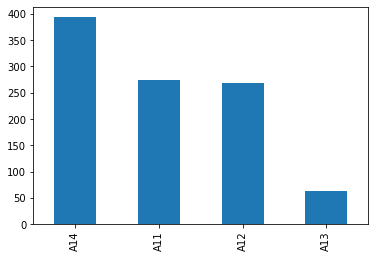

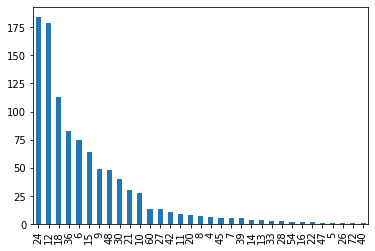

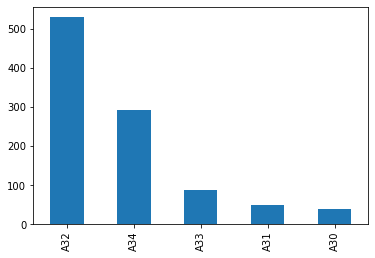

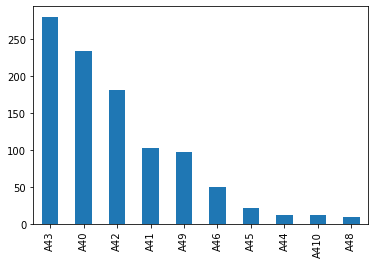

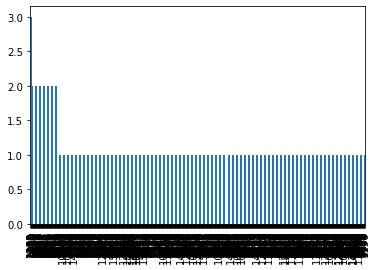

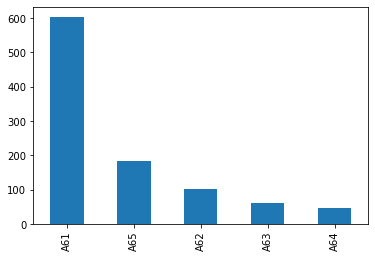

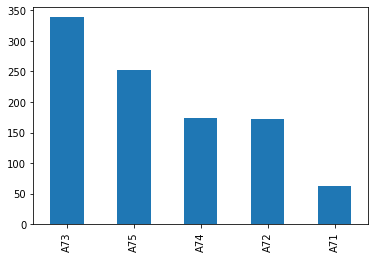

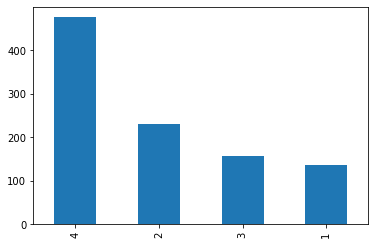

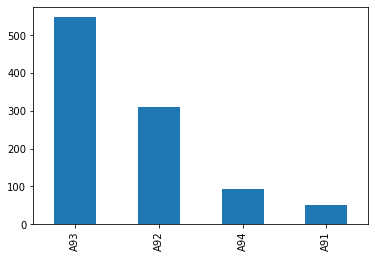

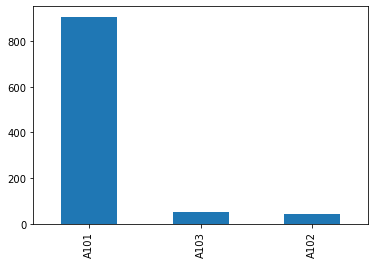

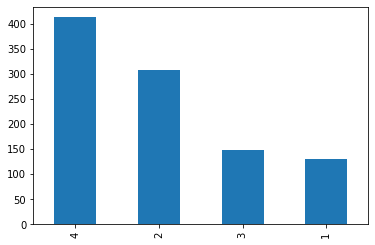

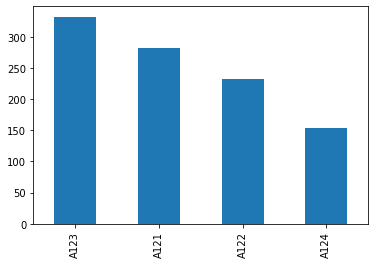

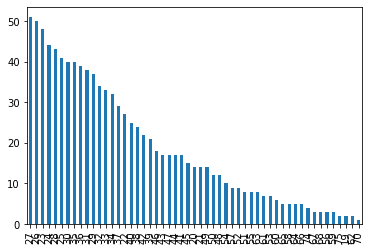

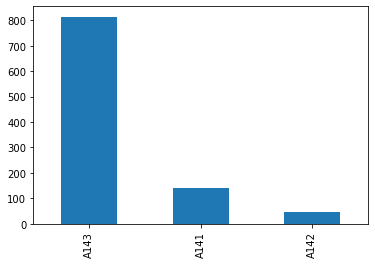

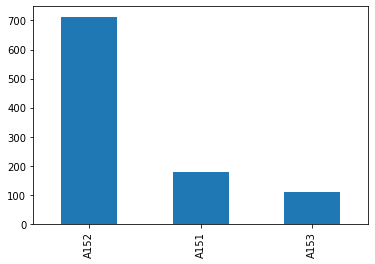

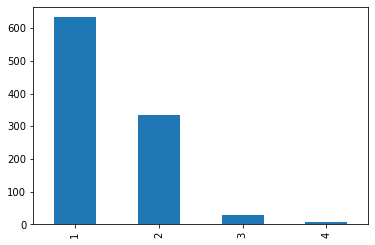

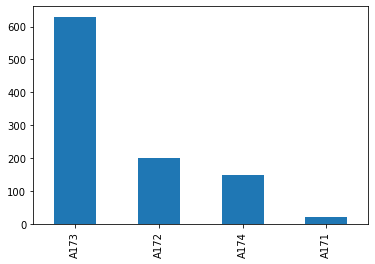

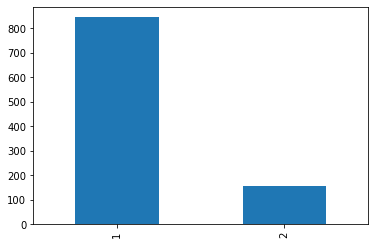

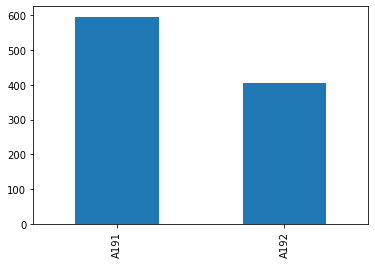

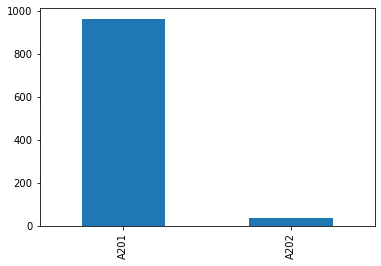

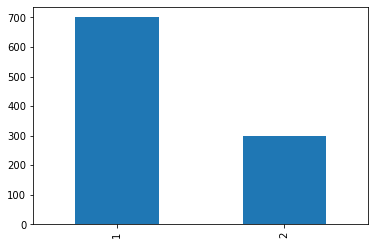

In [20]:
for col in dataset.columns:
    s = col #Erro caso não atribua a uma var
    #print(s, " - Existem ", dataset[s].unique().shape[0], "valores únicos e ", dataset[s].isnull().sum(), " valores vazios\n")
    #print(dataset[s].unique(), "\n")
    #print(dataset[s].value_counts(), "\n")
    #print("\n________________\n")
    dataset[s].value_counts().plot(kind="bar")
    plt.show()

## Resulting analysis
All features have a corresponding value when compared to the dictionary. There are some observations regarding feature values though:

1. Feature "Purpose" has a possible value "A47" (meaning "vacation"), however, no value in the dataset has this feature value
2. Feature "Personal status and sex" has a possible value "A95" (meaning "female: single"), but no value in the dataset has this feature value

These observations have no impact on the validity of the dataset.

In [21]:
dataset["Risk"].value_counts().sort_index()

1    700
2    300
Name: Risk, dtype: int64

# Data validity and possible values

This dataset, unlike Default Credit Card clients, has no issues regarding the validity of the dataset nor issues regarding the order of values

# Correlation matrix to determine if there are feature to remove

There isn't a presence of a pair of features with high correlation between one another, and so, there is no need to remove any feature.


C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_2572/1689072026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feat_corr = dataset.corr()


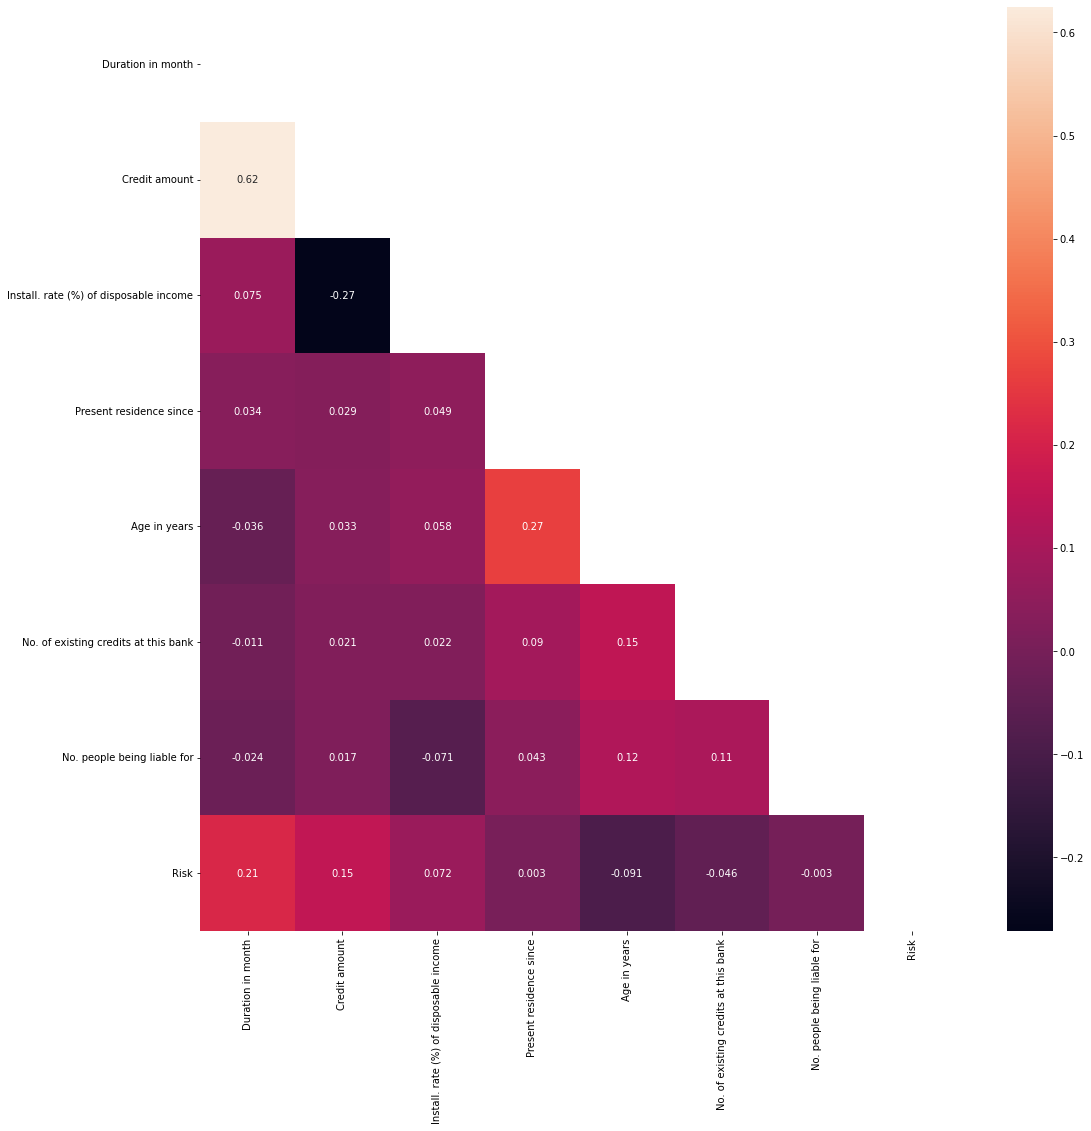

In [22]:
feat_corr = dataset.corr()
fig, ax = plt.subplots(figsize=(17, 17))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sn.heatmap(feat_corr, mask = mask, annot=True, ax=ax)
plt.show()

# One-Hot Encoder for categorical features

There are several categorical features but we need to separate those in which the order matters from those where it does not.

Features where the order matters:
1. Status of existing checking account
4. Savings account or bonds
5. Present employment since
8. Job

Features where the order does not matter and thus viable to treating with OHE:
3. Credit history
1. Purpose
2. Personal status and sex
3. Other debtors or guarantors
4. Property
5. Telephone
6. Other installment plans
7. Housing
6. Foreign worker

In [23]:
status = {"A11" : 1,
            "A12" : 2,
            "A13" : 3,
            "A14" : 4}


savings = {"A61" : 1,
            "A62" : 2,
            "A63" : 3,
            "A64" : 4,
            "A65" : 0}

employ = {"A71" : 1,
            "A72" : 2,
            "A73" : 3,
            "A74" : 4,
            "A75" : 5}

job = {"A171" : 1,
        "A172" : 2,
        "A173" : 3,
        "A174" : 4}


dataset["Status of existing checking account"] = dataset["Status of existing checking account"].replace(status)
dataset["Savings account or bonds"] = dataset["Savings account or bonds"].replace(savings)
dataset["Present employment since"] = dataset["Present employment since"].replace(employ)
dataset["Job"] = dataset["Job"].replace(job)



In [24]:
# columns to one-hot encode - placeholder default credit

ohe_history_dict = {"A30" : "none_paid_duly",
                    "A31" : "all_paid_duly",
                    "A32" : "existing_duly_until_now",
                    "A33" : "delay",
                    "A34" : "critical"}

ohe_purpose_dict = {"A40" : "car_new",
                        "A41" : "car_used",
                        "A42" : "furniture_equipment",
                        "A43" : "radio_television",
                        "A44" : "domestic_appliances",
                        "A45" : "repairs",
                        "A46" : "education",
                        "A47" : "vacation",
                        "A48" : "retraining",
                        "A49" : "business",
                        "A410" :"others"}

ohe_per_status_dict = {"A91" : "male_divorced_separated",
                        "A92" : "female_divorced_separated_married",
                        "A93" : "male_single",
                        "A94" : "male_married_widowed",
                        "A95" : "female_single"}

ohe_debtors_dict = {"A101" : "none",
                    "A102" : "coapplicant",
                    "A103" : "guarantor"}

ohe_property_dict = {"A121" : "real estate",
                        "A122" : "soc_savings_life_insurance",
                        "A123" : "car_other",
                        "A124" : "unknown"}

ohe_install_dict = {"A141" : "bank",
                    "A142" : "stores",
                    "A143" : "none"}

ohe_house_dict = {"A151" : "rent",
                    "A152" : "own",
                    "A153" : "free"}

ohe_telephone_dict = {"A191" : "none",
                        "A192" : "yes"}

ohe_foreign_dict = {"A201" : "yes",
                    "A202" : "no"}

ohe_cols = ["Credit history",
            "Purpose",
            "Personal status and sex",
            "Other debtors or guarantors",
            "Property",
            "Other installment plans",
            "Housing",
            "Telephone",
            "Foreign worker"]

dataset[ohe_cols] = dataset[ohe_cols].astype(str)
dataset["Credit history"] = dataset["Credit history"].replace(ohe_history_dict)
dataset["Purpose"] = dataset["Purpose"].replace(ohe_purpose_dict)
dataset["Personal status and sex"] = dataset["Personal status and sex"].replace(ohe_per_status_dict)
dataset["Other debtors or guarantors"] = dataset["Other debtors or guarantors"].replace(ohe_debtors_dict)
dataset["Property"] = dataset["Property"].replace(ohe_property_dict)
dataset["Other installment plans"] = dataset["Other installment plans"].replace(ohe_install_dict)
dataset["Housing"] = dataset["Housing"].replace(ohe_house_dict)
dataset["Telephone"] = dataset["Telephone"].replace(ohe_telephone_dict)
dataset["Foreign worker"] = dataset["Foreign worker"].replace(ohe_foreign_dict)
# perform one-hot encoding
encoded_cols = pd.get_dummies(dataset[ohe_cols])

# drop the original columns from the DataFrame
#df = df.drop(cols_to_encode, axis=1)

# concatenate the encoded columns to the original DataFrame
dataset = pd.concat([dataset, encoded_cols], axis=1)
dataset = dataset.drop(columns=ohe_cols)

# Outlier identification by application of Inter-Quartile Range (IQR)

1. Present residence since
2. Age
1. Credit amount
1. Duration in month

In [26]:
dataset
iqr_cols =["Credit amount",
"Age in years",
"Present residence since",
"Duration in month"]


# calculate the IQR for each column
q1 = dataset[iqr_cols].quantile(0.25)
q3 = dataset[iqr_cols].quantile(0.75)
iqr = q3 - q1

iqr_range = [1.5]
for x in iqr_range:
    print("IQR Outlier detection with range ", str(x))
    # define the lower and upper bounds for each column
    lower_bound = q1 - (x * iqr)
    upper_bound = q3 + (x * iqr)

    # identify and mark any outliers
    outliers = (dataset[iqr_cols] < lower_bound) | (dataset[iqr_cols] > upper_bound)

    # For each column check the number of outliers present
    for column in outliers.columns:
        print("The column ", column, " has ", outliers[outliers[column] == True][column].count(), " ouliers")
        #print(dataset[iqr_cols][outliers].describe())

        
    print("\n")
    dataset[iqr_cols] = dataset.loc[~outliers.any(axis=1), iqr_cols]
 

IQR Outlier detection with range  1.5
The column  Credit amount  has  72  ouliers
The column  Age in years  has  23  ouliers
The column  Present residence since  has  0  ouliers
The column  Duration in month  has  70  ouliers




In [31]:
dataset = dataset.dropna()

In [32]:
dataset

,Status of existing checking account,Duration in month,Credit amount,Savings account or bonds,Present employment since,Install. rate (%) of disposable income,Present residence since,Age in years,No. of existing credits at this bank,Job,...,Other installment plans_bank,Other installment plans_none,Other installment plans_stores,Housing_free,Housing_own,Housing_rent,Telephone_none,Telephone_yes,Foreign worker_no,Foreign worker_yes
2,4,12.0,2096.0,1,4,2,3.0,49.0,1,2,...,0,1,0,0,1,0,1,0,0,1
3,1,42.0,7882.0,1,4,2,4.0,45.0,1,3,...,0,1,0,1,0,0,1,0,0,1
4,1,24.0,4870.0,1,3,3,4.0,53.0,2,3,...,0,1,0,1,0,0,1,0,0,1
6,4,24.0,2835.0,3,5,3,4.0,53.0,1,3,...,0,1,0,0,1,0,1,0,0,1
7,2,36.0,6948.0,1,3,2,2.0,35.0,1,4,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,36.0,3959.0,1,1,4,3.0,30.0,1,4,...,0,1,0,0,1,0,0,1,0,1
994,4,12.0,2390.0,0,5,4,3.0,50.0,1,3,...,0,1,0,0,1,0,0,1,0,1
995,4,12.0,1736.0,1,4,3,4.0,31.0,1,2,...,0,1,0,0,1,0,1,0,0,1
996,1,30.0,3857.0,1,3,4,4.0,40.0,1,4,...,0,1,0,0,1,0,0,1,0,1


Finally, we need to scale the numerical features. Since those features that were transformed with OHE are already in the range of [0,1], we proceeded to apply scaling to the features: Duration in month, Credit Amount, Age in years, No. of existing credits at this bank, No. people being liable for. 

In [33]:
# Create a transformer that scales selected columns
scaler = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), dataset.columns)])

# Scale the feature values of the dataframe
dataset_sc = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)


In [34]:
dataset_sc

,Status of existing checking account,Duration in month,Credit amount,Savings account or bonds,Present employment since,Install. rate (%) of disposable income,Present residence since,Age in years,No. of existing credits at this bank,Job,...,Other installment plans_bank,Other installment plans_none,Other installment plans_stores,Housing_free,Housing_own,Housing_rent,Telephone_none,Telephone_yes,Foreign worker_no,Foreign worker_yes
0,1.000000,0.210526,0.241876,0.25,0.75,0.333333,0.666667,0.666667,0.000000,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,1.000000,1.000000,0.25,0.75,0.333333,1.000000,0.577778,0.000000,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.526316,0.605346,0.25,0.50,0.666667,1.000000,0.755556,0.333333,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.000000,0.526316,0.338705,0.75,1.00,0.666667,1.000000,0.755556,0.000000,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.333333,0.842105,0.877621,0.25,0.50,0.333333,0.333333,0.355556,0.000000,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.000000,0.842105,0.485980,0.25,0.00,1.000000,0.666667,0.244444,0.000000,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
858,1.000000,0.210526,0.280398,0.00,1.00,1.000000,0.666667,0.688889,0.000000,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
859,1.000000,0.210526,0.194706,0.25,0.75,0.666667,1.000000,0.266667,0.000000,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
860,0.000000,0.684211,0.472615,0.25,0.50,1.000000,1.000000,0.466667,0.000000,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [35]:
dataset_sc.to_csv("german_scaled.csv", sep=';', index=False)

In [36]:
dataset_sc.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit amount', 'Savings account or bonds', 'Present employment since',
       'Install. rate (%) of disposable income', 'Present residence since',
       'Age in years', 'No. of existing credits at this bank', 'Job',
       'No. people being liable for', 'Risk', 'Credit history_all_paid_duly',
       'Credit history_critical', 'Credit history_delay',
       'Credit history_existing_duly_until_now',
       'Credit history_none_paid_duly', 'Purpose_business', 'Purpose_car_new',
       'Purpose_car_used', 'Purpose_domestic_appliances', 'Purpose_education',
       'Purpose_furniture_equipment', 'Purpose_others',
       'Purpose_radio_television', 'Purpose_repairs', 'Purpose_retraining',
       'Personal status and sex_female_divorced_separated_married',
       'Personal status and sex_male_divorced_separated',
       'Personal status and sex_male_married_widowed',
       'Personal status and sex_male_single',
     

In [2]:
filename = "german_scaled.csv"
dataset = pd.read_csv(filename, delimiter=";")

In [3]:
dataset.describe().T.to_excel("german_statinfo.xlsx")